<a href="https://colab.research.google.com/github/huyen1607/Korean-Chatbot-Transformer/blob/main/Korean_Chatbot_using_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 465 kB 69.5 MB/s 


In [ ]:
import os
import pandas as pd
import numpy as np
import json

from konlpy.tag import Okt


In [ ]:
from google.colab import files
src = list(files.upload().values())[0]
open('preprocess.py','wb').write(src)
import preprocess

Saving preprocess.py to preprocess.py


In [ ]:
PATH = '/content/drive/MyDrive/Colab Notebooks/data_in(9)/ChatBotData.csv_short.'
VOCAB_PATH = '/content/drive/MyDrive/Colab Notebooks/data_in(9)/vocabulary.txt'

In [ ]:
inputs, outputs = preprocess.load_data(PATH)

In [ ]:
char2idx, idx2char, vocab_size = preprocess.load_vocabulary(PATH, VOCAB_PATH, tokenize_as_morph=False)

In [ ]:
index_inputs, input_seq_len =preprocess.enc_processing(inputs, char2idx, tokenize_as_morph=False)
index_outputs, output_seq_len = preprocess.dec_output_processing(outputs, char2idx, tokenize_as_morph=False)
index_targets = preprocess.dec_target_processing(outputs, char2idx, tokenize_as_morph=False)

In [ ]:
data_configs = {}
data_configs['char2idx'] = char2idx
data_configs['idx2char'] = idx2char
data_configs['vocab_size'] = vocab_size
data_configs['pad_symbol'] = preprocess.PAD
data_configs['std_symbol'] = preprocess.STD
data_configs['end_symbol'] = preprocess.END
data_configs['unk_symbol'] = preprocess.UNK

In [ ]:
DATA_IN_PATH = '/content/drive/MyDrive/Colab Notebooks/data_in (1)/'
DATA_OUT_PATH = '/content/drive/MyDrive/Colab Notebooks/data_out(new)/'
TRAIN_INPUTS = 'train_inputs.npy'
TRAIN_OUTPUTS = 'train_outputs.npy'
TRAIN_TARGETS = 'train_targets.npy'
DATA_CONFIGS = 'data_configs.json'

np.save(open(DATA_IN_PATH + TRAIN_INPUTS, 'wb'), index_inputs)
np.save(open(DATA_IN_PATH + TRAIN_OUTPUTS , 'wb'), index_outputs)
np.save(open(DATA_IN_PATH + TRAIN_TARGETS , 'wb'), index_targets)

json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'))

In [ ]:
char2idx

{'<PAD>': 0,
 '<SOS>': 1,
 '<END>': 2,
 '<UNK>': 3,
 '남자친구가': 4,
 '가상화폐': 5,
 '줄까': 6,
 '가스불': 7,
 '좋다': 8,
 '나갔어': 9,
 '나': 10,
 '설움': 11,
 '달에는': 12,
 '교회': 13,
 '사세요': 14,
 '생각해보세요': 15,
 '가끔': 16,
 '절약해봐요': 17,
 '같아요': 18,
 '운동': 19,
 '남자친구': 20,
 '하세요': 21,
 '적당히': 22,
 '해': 23,
 '뭐하는지': 24,
 '가만': 25,
 '또': 26,
 '즐기세요': 27,
 '선물로': 28,
 '돈은': 29,
 '때까지': 30,
 '빨리': 31,
 '전생에': 32,
 '감기': 33,
 '자의': 34,
 '걸리겠어': 35,
 '나온거': 36,
 '좀': 37,
 '가스비': 38,
 '오늘': 39,
 '같아': 40,
 '해보세요': 41,
 '잊고': 42,
 '집에': 43,
 '거짓말': 44,
 '있어도': 45,
 '사람도': 46,
 '쫄딱': 47,
 '열': 48,
 '나오세요': 49,
 '뭐가': 50,
 '땀을': 51,
 '함께': 52,
 '집착하지': 53,
 '보인다': 54,
 '망함': 55,
 '거예요': 56,
 '혼자를': 57,
 '마음을': 58,
 '것': 59,
 '데려가고': 60,
 '땀난다': 61,
 '따뜻하게': 62,
 '나라를': 63,
 '따라': 64,
 '좋을': 65,
 '좋을까': 66,
 '운동을': 67,
 '돌아가서': 68,
 '빠를수록': 69,
 '뭘': 70,
 '새출발': 71,
 '바빠': 72,
 '갔어': 73,
 '더': 74,
 '훈훈해': 75,
 '마세요': 76,
 '생일인데': 77,
 '그럴': 78,
 '끄고': 79,
 '어서': 80,
 '게': 81,
 '너무': 82,
 '구하셨나요': 83,
 '믿어줘': 84,
 '질린다'

In [ ]:
idx2char

{0: '<PAD>',
 1: '<SOS>',
 2: '<END>',
 3: '<UNK>',
 4: '남자친구가',
 5: '가상화폐',
 6: '줄까',
 7: '가스불',
 8: '좋다',
 9: '나갔어',
 10: '나',
 11: '설움',
 12: '달에는',
 13: '교회',
 14: '사세요',
 15: '생각해보세요',
 16: '가끔',
 17: '절약해봐요',
 18: '같아요',
 19: '운동',
 20: '남자친구',
 21: '하세요',
 22: '적당히',
 23: '해',
 24: '뭐하는지',
 25: '가만',
 26: '또',
 27: '즐기세요',
 28: '선물로',
 29: '돈은',
 30: '때까지',
 31: '빨리',
 32: '전생에',
 33: '감기',
 34: '자의',
 35: '걸리겠어',
 36: '나온거',
 37: '좀',
 38: '가스비',
 39: '오늘',
 40: '같아',
 41: '해보세요',
 42: '잊고',
 43: '집에',
 44: '거짓말',
 45: '있어도',
 46: '사람도',
 47: '쫄딱',
 48: '열',
 49: '나오세요',
 50: '뭐가',
 51: '땀을',
 52: '함께',
 53: '집착하지',
 54: '보인다',
 55: '망함',
 56: '거예요',
 57: '혼자를',
 58: '마음을',
 59: '것',
 60: '데려가고',
 61: '땀난다',
 62: '따뜻하게',
 63: '나라를',
 64: '따라',
 65: '좋을',
 66: '좋을까',
 67: '운동을',
 68: '돌아가서',
 69: '빠를수록',
 70: '뭘',
 71: '새출발',
 72: '바빠',
 73: '갔어',
 74: '더',
 75: '훈훈해',
 76: '마세요',
 77: '생일인데',
 78: '그럴',
 79: '끄고',
 80: '어서',
 81: '게',
 82: '너무',
 83: '구하셨나요',
 84: '믿어줘',
 85: '

In [ ]:
import tensorflow as tf
import numpy as np
import os

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

In [ ]:
DATA_IN_PATH = '/content/drive/MyDrive/Colab Notebooks/data_in (1)/'
DATA_OUT_PATH = '/content/drive/MyDrive/Colab Notebooks/data_out(new)/'
TRAIN_INPUTS = 'train_inputs.npy'
TRAIN_OUTPUTS = 'train_outputs.npy'
TRAIN_TARGETS = 'train_targets.npy'
DATA_CONFIGS = 'data_configs.json'

In [ ]:
SEED_NUM = 1234
tf.random.set_seed(SEED_NUM)

In [ ]:
index_inputs = np.load(open(DATA_IN_PATH + TRAIN_INPUTS, 'rb'))
index_outputs = np.load(open(DATA_IN_PATH + TRAIN_OUTPUTS , 'rb'))
index_targets = np.load(open(DATA_IN_PATH + TRAIN_TARGETS , 'rb'))
prepro_configs = json.load(open(DATA_IN_PATH + DATA_CONFIGS, 'r'))

In [ ]:
# Show length
print(len(index_inputs),  len(index_outputs), len(index_targets))

20 20 20


In [ ]:
char2idx = prepro_configs['char2idx']
end_index = prepro_configs['end_symbol']
model_name = 'transformer'
vocab_size = prepro_configs['vocab_size']
BATCH_SIZE = 2
MAX_SEQUENCE = 25
EPOCHS = 30
VALID_SPLIT = 0.1

kargs = {'model_name': model_name,
         'num_layers': 2,
         'd_model': 512,
         'num_heads': 8,
         'dff': 2048,
         'input_vocab_size': vocab_size,
         'target_vocab_size': vocab_size,
         'maximum_position_encoding': MAX_SEQUENCE,
         'end_token_idx': char2idx[end_index],
         'rate': 0.1
        }

In [ ]:
def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)

    # add extra dimensions to add the padding
    # to the attention logits.
    return seq[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)

In [ ]:
def create_look_ahead_mask(size):
  mask = 1 - tf.linalg.band_part(tf.ones((size,size)),-1,0)
  return mask

In [ ]:
def create_masks(inp, tar):
    # Encoder padding mask
    enc_padding_mask = create_padding_mask(inp)

    # Used in the 2nd attention block in the decoder.
    # This padding mask is used to mask the encoder outputs.
    dec_padding_mask = create_padding_mask(inp)

    # Used in the 1st attention block in the decoder.
    # It is used to pad and mask future tokens in the input received by
    # the decoder.
    look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
    dec_target_padding_mask = create_padding_mask(tar)
    combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)

    return enc_padding_mask, combined_mask, dec_padding_mask

In [ ]:
def scaled_dot_product_attention(q,k,v,mask):
  matmul_qk = tf.matmul(q,k, transpose_b=True)

  dk=tf.cast(tf.shape(k)[-1], tf.float32)
  scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

  if mask is not None:
    scaled_attention_logits += (mask * -1e9)

  attention_weights = tf.nn.softmax(scaled_attention_logits,axis=-1)

  output = tf.matmul(attention_weights, v)

  return output, attention_weights

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
  def __init__(self, **kargs):
    super(MultiHeadAttention, self).__init__()
    self.num_heads = kargs['num_heads']
    self.d_model = kargs['d_model']

    assert self.d_model % self.num_heads == 0

    self.depth = self.d_model // self.num_heads

    self.wq = tf.keras.layers.Dense(kargs['d_model'])
    self.wk = tf.keras.layers.Dense(kargs['d_model'])
    self.wv = tf.keras.layers.Dense(kargs['d_model'])

    self.dense = tf.keras.layers.Dense(kargs['d_model'])

  def split_heads(self, x, batch_size):
    x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(x, perm=[0,2,1,3])

  def call(self,v,k,q,mask):
    batch_size=tf.shape(q)[0]

    q = self.wq(q)
    k = self.wk(k)
    v = self.wv(v)

    q = self.split_heads(q, batch_size)
    k = self.split_heads(k, batch_size)
    v = self.split_heads(v, batch_size)

    scaled_attention, attention_weights = scaled_dot_product_attention(
        q,k,v,mask)
    scaled_attention = tf.transpose(scaled_attention, perm = [0,2,1,3])
    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size,-1, self.d_model))
    output = self.dense(concat_attention)

    return output, attention_weights

In [ ]:
def point_wise_feed_forward_network(**kargs):
  return tf.keras.Sequential([tf.keras.layers.Dense(kargs['dff'], activation ='relu'),
                              tf.keras.layers.Dense(kargs['d_model'])
  ])

In [ ]:
def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * i//2) / np.float32(d_model))
  return pos * angle_rates

In [ ]:
def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)

  angle_rads[:,0::2] = np.sin(angle_rads[:, 0::2])

  angle_rads[:,1::2] = np.cos(angle_rads[:, 1::2])

  pos_encoding = angle_rads[np.newaxis, ...]

  return tf.cast(pos_encoding, dtype=tf.float32)

In [ ]:
class EncoderLayer(tf.keras.layers.Layer):
  def __init__(self, **kargs):
    super(EncoderLayer, self).__init__()

    self.mha = MultiHeadAttention(**kargs)
    self.ffn = point_wise_feed_forward_network(**kargs)

    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

    self.dropout1 = tf.keras.layers.Dropout(kargs['rate'])
    self.dropout2 = tf.keras.layers.Dropout(kargs['rate'])

  def call(self, x, mask):
    attn_output, _ = self.mha(x, x, x, mask)
    attn_output = self.dropout1(attn_output)
    out1 = self.layernorm1(x + attn_output)

    ffn_output = self.ffn(out1)
    ffn_output = self.dropout2(ffn_output)
    out2 = self.layernorm2(ffn_output + out1)

    return out2

In [ ]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, **kargs):
    super(Encoder, self).__init__()

    self.d_model = kargs['d_model']
    self.num_layers = kargs['num_layers']

    self.embedding = tf.keras.layers.Embedding(kargs['input_vocab_size'], self.d_model)
    self.pos_encoding = positional_encoding(kargs['maximum_position_encoding'],
                                            self.d_model)

    self.enc_layers = [EncoderLayer(**kargs)
                       for _ in range(self.num_layers)]

    self.dropout = tf.keras.layers.Dropout(kargs['rate'])

  def call(self, x, mask):

    seq_len = tf.shape(x)[1]

    x = self.embedding(x)
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :seq_len, :]


    x = self.dropout(x)

    for i in range(self.num_layers):
      x=self.enc_layers[i](x,mask)

    return x

In [ ]:
class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self, **kargs):
    super(DecoderLayer, self).__init__()

    self.mha1 = MultiHeadAttention(**kargs)
    self.mha2 = MultiHeadAttention(**kargs)

    self.ffn = point_wise_feed_forward_network(**kargs)

    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

    self.dropout1 = tf.keras.layers.Dropout(kargs['rate'])
    self.dropout2 = tf.keras.layers.Dropout(kargs['rate'])
    self.dropout3 = tf.keras.layers.Dropout(kargs['rate'])

  def call(self, x, enc_output, look_ahead_mask, padding_mask):
    attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)
    attn1 = self.dropout1(attn1)
    out1 = self.layernorm1(attn1 + x)

    attn2, attn_weights_block2 = self.mha2(enc_output, enc_output, out1, padding_mask)
    attn2 = self.dropout2(attn2)
    out2 = self.layernorm2(attn2 + out1)

    ffn_output = self.ffn(out2)
    ffn_output = self.dropout3(ffn_output)
    out3 = self.layernorm3(ffn_output + out2)

    return out3, attn_weights_block1, attn_weights_block2

In [ ]:
class Decoder(tf.keras.layers.Layer):
  def __init__(self, **kargs):
    super(Decoder, self).__init__()

    self.d_model = kargs['d_model']
    self.num_layers = kargs['num_layers']

    self.embedding = tf.keras.layers.Embedding(kargs['target_vocab_size'], self.d_model)
    self.pos_encoding = positional_encoding(kargs['maximum_position_encoding'],
                                            self.d_model)

    self.dec_layers = [DecoderLayer(**kargs)
                       for _ in range(self.num_layers)]

    self.dropout = tf.keras.layers.Dropout(kargs['rate'])

  def call(self, x, enc_output, look_ahead_mask, padding_mask):

    seq_len = tf.shape(x)[1]
    attention_weights ={}

    x = self.embedding(x)
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :seq_len, :]


    x = self.dropout(x)

    for i in range(self.num_layers):
      x, block1, block2 = self.dec_layers[i](x, enc_output, look_ahead_mask, padding_mask)

      attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
      attention_weights['decoder_layer{}_block2'.format(i+1)] = block2

    return x, attention_weights

In [ ]:
class Transformer(tf.keras.Model):
    def __init__(self, **kargs):
        super(Transformer, self).__init__(name=kargs['model_name'])
        self.end_token_idx = kargs['end_token_idx']

        self.encoder = Encoder(**kargs)
        self.decoder = Decoder(**kargs)

        self.final_layer = tf.keras.layers.Dense(kargs['target_vocab_size'])

    def call(self, x):
        inp, tar = x

        enc_padding_mask, look_ahead_mask, dec_padding_mask = create_masks(inp, tar)
        enc_output = self.encoder(inp, enc_padding_mask)

        dec_output, _ = self.decoder(
            tar, enc_output, look_ahead_mask, dec_padding_mask)

        final_output = self.final_layer(dec_output)

        return final_output


    def inference(self, x):
        inp  = x
        tar = tf.expand_dims([STD_INDEX],0)

        enc_padding_mask, look_ahead_mask, dec_padding_mask =create_masks(inp, tar) #create_look_ahead_mask
        enc_output = self.encoder(inp, enc_padding_mask)

        predict_tokens = list()
        for t in range(0, MAX_SEQUENCE):
            dec_output, _ = self.decoder(tar, enc_output, look_ahead_mask, dec_padding_mask)
            final_output = self.final_layer(dec_output)
            outputs = tf.argmax(final_output, -1).numpy()
            pred_token = outputs[0][-1]
            if pred_token == self.end_token_idx:
              break
            predict_tokens.append(pred_token)
            tar = tf.expand_dims([STD_INDEX] + predict_tokens, 0)
            _, look_ahead_mask, dec_padding_mask = create_masks(inp, tar)

        return predict_tokens

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')

def loss(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    return tf.reduce_mean(loss_)

def accuracy(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    mask = tf.expand_dims(tf.cast(mask, dtype=pred.dtype), axis=-1)
    pred *= mask
    acc = train_accuracy(real, pred)

    return tf.reduce_mean(acc)

In [ ]:
model = Transformer(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss=loss, metrics=[accuracy])

In [ ]:
PATH = DATA_OUT_PATH + model_name
if not(os.path.isdir(PATH)):
        os.makedirs(os.path.join(PATH))

checkpoint_path = DATA_OUT_PATH + model_name + '/weights.h5'

cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=10)

history = model.fit([index_inputs, index_outputs], index_targets,
                    batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

Epoch 1/30
7/9 [======================>.......] - ETA: 0s - loss: 0.9688 - accuracy: 0.8234
Epoch 1: val_accuracy improved from -inf to 0.84800, saving model to /content/drive/MyDrive/Colab Notebooks/data_out(new)/transformer/weights.h5
9/9 [==============================] - 9s 163ms/step - loss: 0.9745 - accuracy: 0.8284 - val_loss: 0.5545 - val_accuracy: 0.8480
Epoch 2/30
8/9 [=========================>....] - ETA: 0s - loss: 0.6559 - accuracy: 0.8470
Epoch 2: val_accuracy improved from 0.84800 to 0.85200, saving model to /content/drive/MyDrive/Colab Notebooks/data_out(new)/transformer/weights.h5
9/9 [==============================] - 0s 52ms/step - loss: 0.6655 - accuracy: 0.8474 - val_loss: 0.6545 - val_accuracy: 0.8520
Epoch 3/30
9/9 [==============================] - ETA: 0s - loss: 0.5678 - accuracy: 0.8554
Epoch 3: val_accuracy improved from 0.85200 to 0.85733, saving model to /content/drive/MyDrive/Colab Notebooks/data_out(new)/transformer/weights.h5
9/9 [=====================

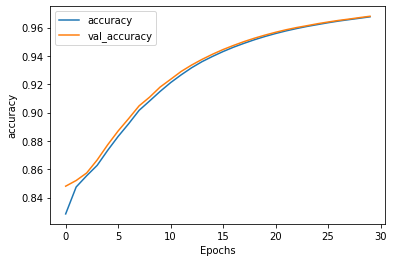

In [ ]:
plot_graphs(history, 'accuracy')

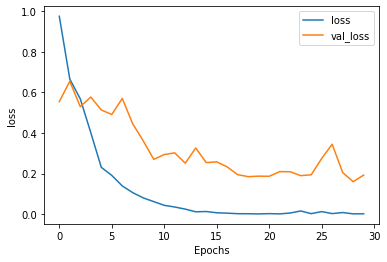

In [ ]:
plot_graphs(history, 'loss')

In [ ]:
SAVE_FILE_NM = "weights.h5"
model.load_weights(os.path.join(DATA_OUT_PATH, model_name, SAVE_FILE_NM))

In [ ]:
from preprocess import enc_processing

In [ ]:
char2idx = prepro_configs['char2idx']
idx2char = prepro_configs['idx2char']

In [ ]:
text = '남자친구 승진 선물로 뭐가 좋을까?'

test_index_inputs, _ = enc_processing([text], char2idx)
outputs = model.inference(test_index_inputs)
#print(predict_tokens)

print(' '.join([idx2char[str(o)] for o in outputs]))

평소에 필요했던 게 좋을 것 같아요
